<a href="https://colab.research.google.com/github/Rahul-0O4/Deep_Learning_Project/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Count the total number of images in the dataset 0-Yes 1-No
ROOT_DIR = "/content/drive/MyDrive/DataDS/Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [3]:
number_of_images.items()

dict_items([('healthy', 408), ('tumor', 392)])

### We will split the dataset such that:
* 70% will be train data
* 15% will be validation
* 15% will bet test data

In [4]:
def dataFolder(p, split):
  # We will create a training folder
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace= False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O, D)
  else:
    print(f"{p} Folder exist")

In [5]:
dataFolder("train", 0.7)

In [6]:
dataFolder("val", 0.15)

In [7]:
dataFolder("test", 0.15)

## Building the model

In [8]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [9]:
## CNN Model

model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= "relu", input_shape = (224,224,3)))

model.add(Conv2D(filters= 36, kernel_size= (3,3), activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2))) # To prevent overfitting

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units= 64, activation= "relu"))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= "sigmoid"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics= ['accuracy'])

### Preparing the data using data generator

In [11]:
def preProcessingImagesTrain(path):
  """
  input: Path
  output: Pre Processsed Images
  """

  img_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = img_data.flow_from_directory(directory= path, target_size = (224,224), batch_size= 32, class_mode= 'binary')

  return image

In [12]:
path = "/content/train"
train_data = preProcessingImagesTrain(path)

Found 549 images belonging to 2 classes.


In [13]:
def preProcessingImages(path):
  """
  input: Path
  output: Pre Processsed Images
  """

  img_data = ImageDataGenerator(rescale= 1/255)
  image = img_data.flow_from_directory(directory= path, target_size = (224,224), batch_size= 32, class_mode= 'binary')

  return image

In [14]:
path = "/content/test"
test_data = preProcessingImages(path)

Found 109 images belonging to 2 classes.


In [15]:
path = "/content/val"
val_data = preProcessingImages(path)

Found 109 images belonging to 2 classes.


In [16]:
## Early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Early Stopping
es = EarlyStopping(monitor= "val_accuracy", min_delta= 0.01, patience= 3, verbose= 1, mode= "auto")

## Model Checkpoint
mc = ModelCheckpoint(filepath= "./bestmodel.keras", monitor= "val_accuracy", verbose= 1, save_best_only= True, mode= "auto")

cd = [es,mc]

### Training the model

In [17]:
hs = model.fit(train_data, steps_per_epoch= 8, epochs= 100, verbose= 1, validation_data= val_data, validation_steps= 16, callbacks= cd)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5251 - loss: 0.8701
Epoch 1: val_accuracy improved from -inf to 0.52294, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5308 - loss: 0.8626 - val_accuracy: 0.5229 - val_loss: 0.6507
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6032 - loss: 0.6416
Epoch 2: val_accuracy improved from 0.52294 to 0.68807, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.6073 - loss: 0.6420 - val_accuracy: 0.6881 - val_loss: 0.6410
Epoch 3/100
2/8 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7656 - loss: 0.6637
Epoch 3: val_accuracy improved from 0.68807 to 0.77064, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 813ms/step - accuracy: 0.7070 - loss: 0.6656 - val_accuracy: 0.7706 - val_loss: 0.6227
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7545 - loss: 0.5867
Epoch 4: val_accuracy improved from 0.77064 to 0.86239, saving 

In [18]:
# Model Graphical Interpretation
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

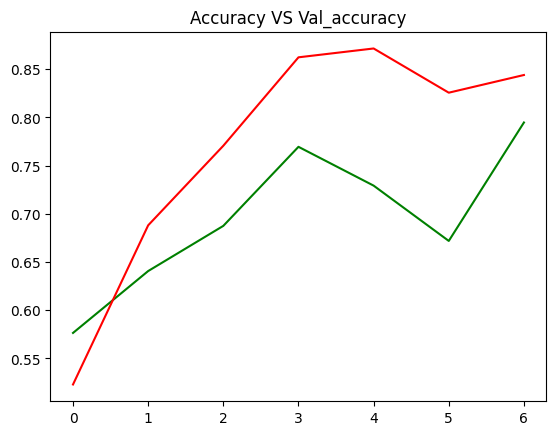

In [19]:
plt.plot(h['accuracy'], c= "green")
plt.plot(h['val_accuracy'] , c= "red")

plt.title("Accuracy VS Val_accuracy")
plt.show()

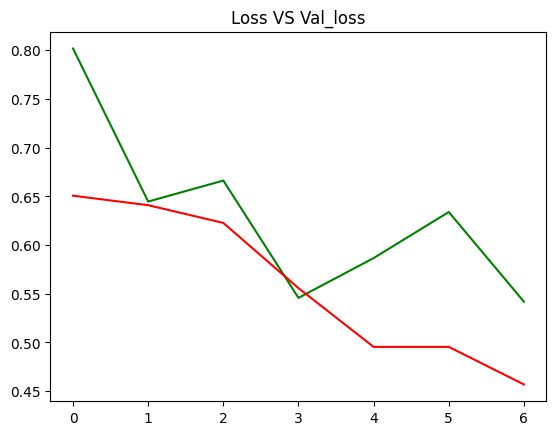

In [20]:
plt.plot(h['loss'], c= "green")
plt.plot(h['val_loss'] , c= "red")

plt.title("Loss VS Val_loss")
plt.show()

In [21]:
# Model Accuracy
from keras.models import load_model

best_model = load_model("/content/bestmodel.keras")

### Model Accuracy

In [22]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100} %")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.7917 - loss: 0.4967
The accuracy of the model is 80.73394298553467 %


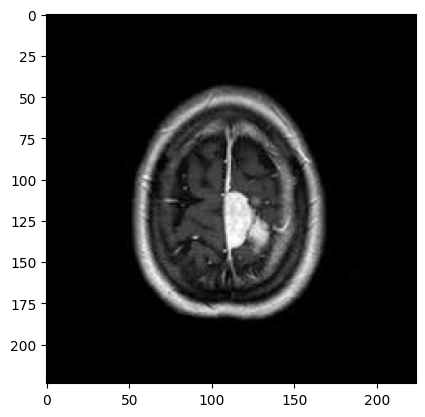

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1
The MRI is having Tumor


In [23]:
from keras.preprocessing.image import load_img, img_to_array

path = "/content/drive/MyDrive/DataDS/Dataset/tumor/tumor (183).jpg"
img = load_img(path, target_size= (224, 224))

input_arr = img_to_array(img)/255
input_arr.shape

plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict(input_arr) # gives probability
pred_class = (pred > 0.5).astype("int32") # 0 or 1
print(pred_class[0][0])

if pred_class == 0:
  print("The MRI is not having Tumor")
else:
  print("The MRI is having Tumor")

In [24]:
train_data.class_indices

{'healthy': 0, 'tumor': 1}